<a href="https://colab.research.google.com/github/mazidzomader/CSE422-PYTHON_BRACU/blob/main/Lab%20Materials/Lab%2005%20-%20Unsupervised%20Learning/CSE422%20Lab%2005%20part%2002%20%5BGaussian_Mixture_Model_(GMM)%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **📘 What is a Gaussian Mixture Model (GMM)?**

A Gaussian Mixture Model (GMM) is a probabilistic model that assumes data points are generated from a combination (or mixture) of several Gaussian distributions. Each of these distributions represents a cluster, and the GMM tries to identify the underlying clusters by estimating the parameters of those Gaussians.

Unlike simpler clustering algorithms like K-Means, which assign each data point to one cluster (called hard clustering), GMM assigns a probability of belonging to each cluster (called soft clustering). This means a point can partially belong to multiple clusters at the same time, depending on how close it is to the center of each cluster.

GMM is commonly used in clustering, anomaly detection, image segmentation, speech recognition, and more.

**🎯 Example (Intuition)**

Imagine you are analyzing the heights of people in a city. If your data contains both adults and children, the height distribution will likely have two peaks — one for the children's heights and another for adults. Instead of modeling all heights with a single average and standard deviation, GMM can model the data using two Gaussian distributions — one for children and one for adults — and combine them to represent the full population more accurately.
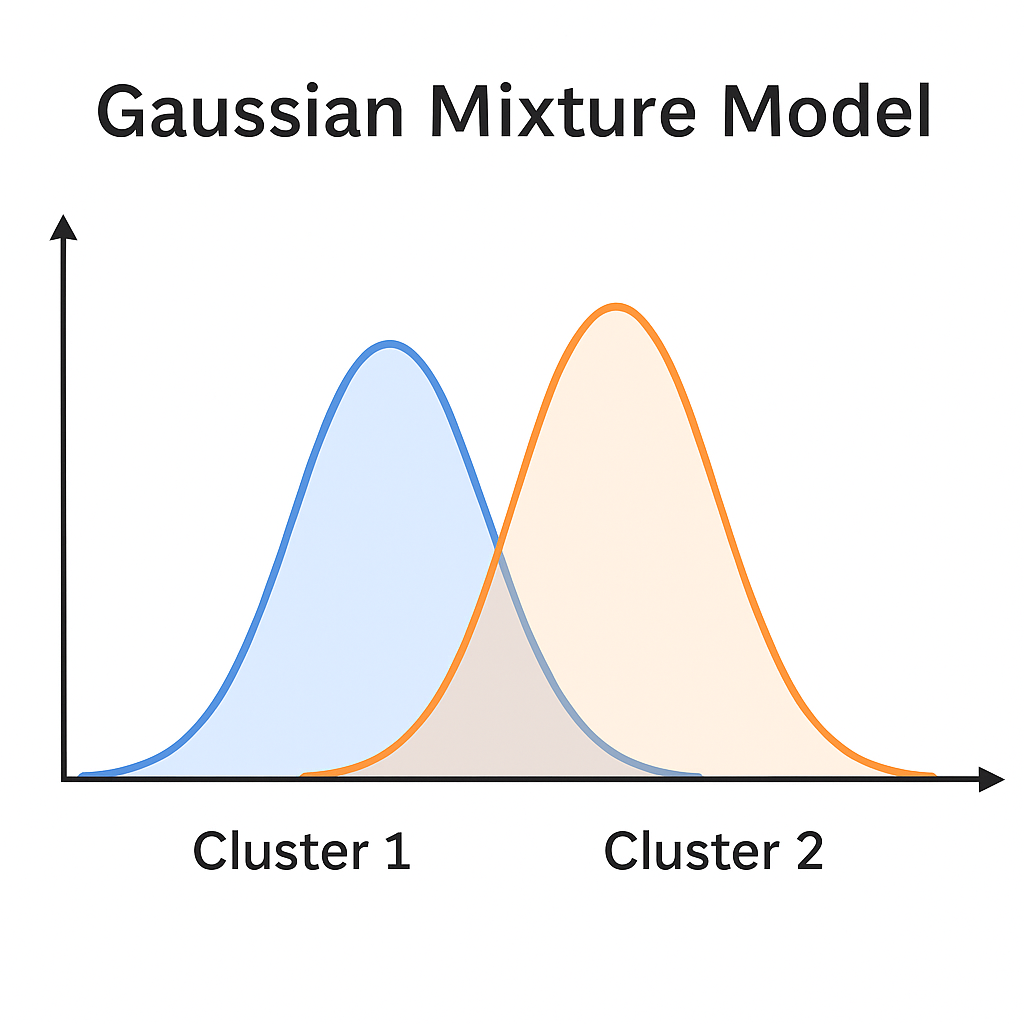

# **🧠 Mathematical Intuition Behind Gaussian Mixture Models (GMM)**

Now that we know GMM is a combination of several Gaussian distributions, let's break it down and understand how the mathematics behind it works — step by step.

**🔹 Step 1: Start with a Single Gaussian Distribution**

A Gaussian distribution, also known as a normal distribution, describes how data is spread around a mean value.

In one dimension, the formula for a Gaussian distribution is:
$$
\mathcal{N}(x \mid \mu, \sigma^2) = \frac{1}{\sqrt{2\pi\sigma^2}} \, \exp\left( -\frac{(x - \mu)^2}{2\sigma^2} \right)
$$

🔍 What do these symbols mean?

* $x$: The data point (a scalar value).
* 𝜇: The mean (center) of the distribution.
* 𝜎: The variance (spread) of the distribution.
* exp: The exponential function $e^x$, which shapes the bell curve.

📌 This formula tells us the probability density (likelihood) of a point
𝑥
x under a Gaussian distribution with a given mean and variance.

**🔹 Step 2: Extend to Multiple Dimensions (Multivariate Gaussian)**

Real-world data often has more than one feature (e.g., height and weight together). So we extend the Gaussian to multiple dimensions.

The multivariate Gaussian looks like this:

$$
\mathcal{N}(\mathbf{x} \mid \boldsymbol{\mu}, \boldsymbol{\Sigma}) =
\frac{1}{(2\pi)^{d/2} \, |\boldsymbol{\Sigma}|^{1/2}}
\, \exp\left( -\frac{1}{2} (\mathbf{x} - \boldsymbol{\mu})^\top
\boldsymbol{\Sigma}^{-1} (\mathbf{x} - \boldsymbol{\mu}) \right)
$$

🔍 What’s new here?

* $\mathbf{x}$: A vector (e.g., [height, weight]) representing a data point in 𝑑-dimensional space.

* 𝜇: A mean vector, one mean per dimension.

* 𝛴: A covariance matrix describing the spread and relationships between the features.

* ∣𝛴∣: The determinant of the covariance matrix.

* $𝛴^{−1}$: The inverse of the covariance matrix.

* 𝑑: The number of dimensions.

📌 This gives the likelihood of a data point $\mathbf{x}$ in a multi-feature setting.

**🔹 Step 3: Introducing the Mixture Concept**

Now, instead of having just one Gaussian, GMM assumes the data is generated from a mixture of multiple Gaussians. Let’s say we want to model the data using K different Gaussian components.

Each Gaussian component has:



*   Its own mean: $\mu_k$
*   Its own covariance: $\Sigma_k$
*   And a mixing coefficient: $\pi_k$ (like a weight or probability)


The final GMM formula becomes:

$$
p(\mathbf{x}) = \sum_{k=1}^{K} \pi_k \,
\mathcal{N}(\mathbf{x} \mid \boldsymbol{\mu}_k, \boldsymbol{\Sigma}_k)
$$

🔍 What this means:

For each component 𝑘, we compute the probability that $\mathbf{x}$ belongs to that component. We then sum the weighted probabilities from all components.

The mixing coefficients $\pi_k$ must satisfy:

$$
0 \leq \pi_k \leq 1, \quad \sum_{k=1}^{K} \pi_k = 1
$$

📌 The final result $p(\mathbf{x}) $ is the overall likelihood of the data point $\mathbf{x}$ under the entire mixture model.

# **📌 Gaussian Mixture Model (GMM): Full Training & Testing Process**

**🔷 Assumptions**
A Gaussian Mixture Model assumes that the data is generated from a mixture of $K$ Gaussian distributions. Each cluster $k$ is represented by:

* Mean: $\mu_k$
* Covariance matrix: $\Sigma_k$
* Mixing coefficient: $\pi_k$

**📚 Expectation-Maximization (EM) Algorithm for GMM**

We use the EM algorithm to estimate the unknown parameters ${\mu_k, \Sigma_k, \pi_k}_{k=1}^K$ of the model.


### Step-by-step EM Algorithm:

#### 1. **Initialization**
Randomly initialize:
- Means: $\mu_k$
- Covariances: $\Sigma_k$
- Mixing coefficients: $\pi_k$ (such that \( \sum_{k=1}^K \pi_k = 1 \))

---

#### 2. **E-Step (Expectation Step)**

Calculate the **responsibilities** (i.e., the probability that data point \( x_n \) belongs to cluster \( k \)):

$$
\gamma_{nk} = \frac{ \pi_k \cdot \mathcal{N}(x_n | \mu_k, \Sigma_k) }{ \sum_{j=1}^K \pi_j \cdot \mathcal{N}(x_n | \mu_j, \Sigma_j) }
$$

Here, \( \gamma_{nk} \) is the responsibility of cluster \( k \) for data point \( x_n \).

---

#### 3. **M-Step (Maximization Step)**

Update the parameters using the responsibilities:

- Effective number of points assigned to cluster \( k \):

$$
N_k = \sum_{n=1}^N \gamma_{nk}
$$

- Update means:

$$
\mu_k = \frac{1}{N_k} \sum_{n=1}^N \gamma_{nk} x_n
$$

- Update covariances:

$$
\Sigma_k = \frac{1}{N_k} \sum_{n=1}^N \gamma_{nk} (x_n - \mu_k)(x_n - \mu_k)^T
$$

- Update mixing coefficients:

$$
\pi_k = \frac{N_k}{N}
$$

---

#### 4. **Log-Likelihood**

To check convergence, compute the **log-likelihood** of the data under the current parameters:

$$
\log p(X|\theta) = \sum_{n=1}^N \log \left( \sum_{k=1}^K \pi_k \cdot \mathcal{N}(x_n | \mu_k, \Sigma_k) \right)
$$

If the log-likelihood converges (or changes very little), stop the algorithm. Otherwise, return to the E-step.

---

### Summary of EM Iterations

Repeat the following until convergence:
- E-Step: Compute $\gamma_{nk}$
- M-Step: Update $\mu_k$, $\Sigma_k$, $\pi_k$



### Cluster Assignment for a New Data Point in GMM

Once the GMM is trained, for a **new data point** $x_{\text{new}}$, we compute its **responsibility** with respect to each Gaussian component.

#### Responsibility:

$$
\gamma_k(x_{\text{new}}) = \frac{ \pi_k \cdot \mathcal{N}(x_{\text{new}} \mid \mu_k, \Sigma_k) }{ \sum_{j=1}^K \pi_j \cdot \mathcal{N}(x_{\text{new}} \mid \mu_j, \Sigma_j) }
$$

Where:
- $\pi_k $ = mixing coefficient for component $k$

- $\mu_k $ = mean of component $k$

- $\Sigma_k$ = covariance matrix of component \( k \)

- $\mathcal{N}(x \mid \mu_k, \Sigma_k) $ = multivariate Gaussian PDF

#### Cluster Assignment Rule:

Assign the new point $x_{\text{new}}$ to the cluster with **maximum responsibility**:

$$
\hat{k} = \arg\max_k \; \gamma_k(x_{\text{new}})
$$

---

### Interpretation:

- The model computes how likely the point belongs to each cluster.
- The cluster (Gaussian component) with the **highest posterior probability** is selected as the assignment.



A visulazation of how Gaussian Mixture Model Clusters are being formed.

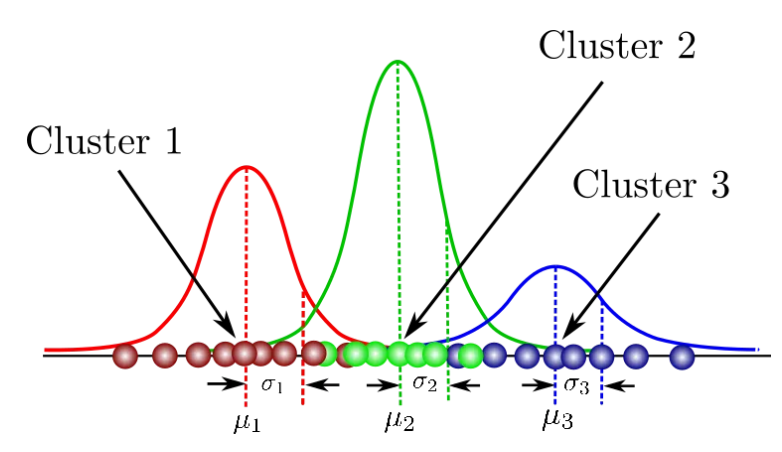

# **⛳Coding GMM**

# **✈ Coding GMM from ground up**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from matplotlib.patches import Ellipse

# Load and preprocess the data (using only two features for 2D visualization)
iris = load_iris()
X = iris.data[:, :2]  # only take first 2 features
X = StandardScaler().fit_transform(X)  # normalize
n_samples, n_features = X.shape

In [ ]:
#We define the number of Gaussian components (clusters), and initialize means, covariances, and mixing coefficients randomly.

def initialize_parameters(X, n_components, seed=42):
    np.random.seed(seed)

    n_samples, n_features = X.shape

    # Randomly choose initial means from data
    indices = np.random.choice(n_samples, n_components, replace=False)
    means = X[indices]

    # Initialize covariances as identity matrices
    covariances = np.array([np.eye(n_features) for _ in range(n_components)])

    # Mixing coefficients (uniform to start)
    weights = np.ones(n_components) / n_components

    return means, covariances, weights

In [ ]:
#In this step, we calculate the responsibilities, i.e., the probability that a given data point belongs to each Gaussian component.

def gaussian_pdf(x, mean, cov): #probability distribution function
    """Multivariate Gaussian PDF"""
    n = x.shape[0]
    diff = x - mean
    exp_term = np.exp(-0.5 * diff.T @ np.linalg.inv(cov) @ diff)
    denom = np.sqrt((2 * np.pi) ** n * np.linalg.det(cov))
    return exp_term / denom

def expectation_step(X, means, covariances, weights):
    n_samples = X.shape[0]
    n_components = means.shape[0]

    # Responsibility matrix (N x K)
    responsibilities = np.zeros((n_samples, n_components))

    for i in range(n_samples):
        for k in range(n_components):
            resp = weights[k] * gaussian_pdf(X[i], means[k], covariances[k])
            responsibilities[i, k] = resp

        # Normalize to get probabilities (sum over k = 1)
        responsibilities[i] /= np.sum(responsibilities[i])

    return responsibilities


In [ ]:
#In this step, you update the means, covariances, and mixing coefficients based on the responsibilities from the E-step.

def maximization_step(X, responsibilities):
    n_samples, n_features = X.shape
    n_components = responsibilities.shape[1]

    Nk = np.sum(responsibilities, axis=0)  # Effective number of points assigned to each cluster

    # Update means
    means = np.zeros((n_components, n_features))
    for k in range(n_components):
        means[k] = (1 / Nk[k]) * np.sum(responsibilities[:, k][:, np.newaxis] * X, axis=0)

    # Update covariances
    covariances = np.zeros((n_components, n_features, n_features))
    for k in range(n_components):
        diff = X - means[k]
        weighted_sum = np.zeros((n_features, n_features))
        for i in range(n_samples):
            weighted_sum += responsibilities[i, k] * np.outer(diff[i], diff[i])
        covariances[k] = weighted_sum / Nk[k]

    # Update weights (mixing coefficients)
    weights = Nk / n_samples

    return means, covariances, weights


In [ ]:
# Log-likelihood calculation (optional but useful for convergence monitoring)

def compute_log_likelihood(X, means, covariances, weights):
    n_samples = X.shape[0]
    n_components = means.shape[0]
    log_likelihood = 0.0

    for i in range(n_samples):
        prob_sum = 0
        for k in range(n_components):
            prob_sum += weights[k] * gaussian_pdf(X[i], means[k], covariances[k])
        log_likelihood += np.log(prob_sum)

    return log_likelihood

In [ ]:
# Putting it all together: EM algorithm loop

def gmm_em(X, n_components, n_iters=100, tol=1e-4):
    means, covariances, weights = initialize_parameters(X, n_components)

    log_likelihood_old = None

    for iteration in range(n_iters):
        # E-step
        responsibilities = expectation_step(X, means, covariances, weights)

        # M-step
        means, covariances, weights = maximization_step(X, responsibilities)

        # Compute log-likelihood
        log_likelihood = compute_log_likelihood(X, means, covariances, weights)
        print(f"Iteration {iteration+1}, Log-Likelihood: {log_likelihood:.4f}")

        # Check for convergence
        if log_likelihood_old is not None and abs(log_likelihood - log_likelihood_old) < tol:
            print("Converged")
            break

        log_likelihood_old = log_likelihood

    return means, covariances, weights, responsibilities


In [ ]:

# Run GMM EM
n_components = 3
means, covariances, weights, responsibilities = gmm_em(X, n_components)

# Assign each point to cluster with highest responsibility
cluster_assignments = np.argmax(responsibilities, axis=1)

Iteration 1, Log-Likelihood: -417.2503
Iteration 2, Log-Likelihood: -412.2576
Iteration 3, Log-Likelihood: -404.6350
Iteration 4, Log-Likelihood: -394.7930
Iteration 5, Log-Likelihood: -384.2479
Iteration 6, Log-Likelihood: -380.5072
Iteration 7, Log-Likelihood: -379.9130
Iteration 8, Log-Likelihood: -379.4484
Iteration 9, Log-Likelihood: -378.9224
Iteration 10, Log-Likelihood: -378.3443
Iteration 11, Log-Likelihood: -377.7863
Iteration 12, Log-Likelihood: -377.3275
Iteration 13, Log-Likelihood: -376.9991
Iteration 14, Log-Likelihood: -376.7843
Iteration 15, Log-Likelihood: -376.6511
Iteration 16, Log-Likelihood: -376.5699
Iteration 17, Log-Likelihood: -376.5195
Iteration 18, Log-Likelihood: -376.4866
Iteration 19, Log-Likelihood: -376.4640
Iteration 20, Log-Likelihood: -376.4479
Iteration 21, Log-Likelihood: -376.4359
Iteration 22, Log-Likelihood: -376.4268
Iteration 23, Log-Likelihood: -376.4197
Iteration 24, Log-Likelihood: -376.4140
Iteration 25, Log-Likelihood: -376.4093
Iteration

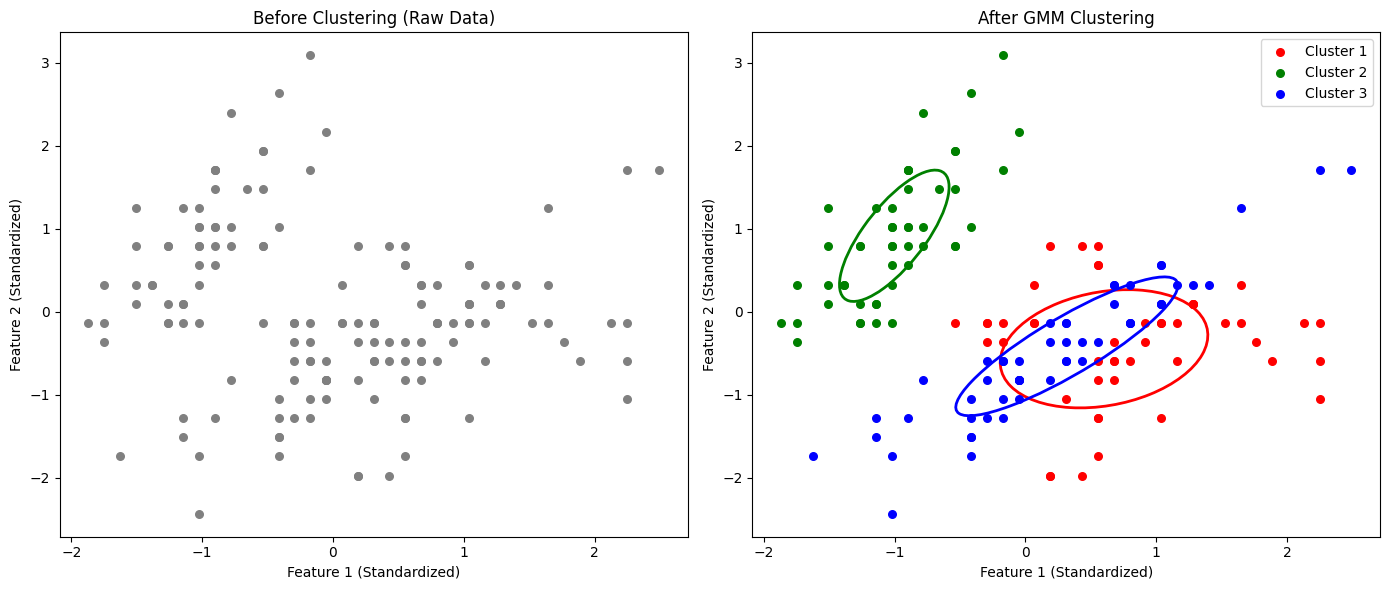

In [ ]:
# Visualization function to plot Gaussian ellipses
def plot_gaussian_ellipse(ax, mean, cov, color):
    vals, vecs = np.linalg.eigh(cov)
    order = vals.argsort()[::-1]
    vals, vecs = vals[order], vecs[:, order]

    angle = np.degrees(np.arctan2(*vecs[:,0][::-1]))
    width, height = 2 * np.sqrt(vals)

    ellipse = Ellipse(xy=mean, width=width, height=height, angle=angle, edgecolor=color, fc='None', lw=2)
    ax.add_patch(ellipse)

colors = ['r', 'g', 'b']
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Before Clustering
axs[0].scatter(X[:, 0], X[:, 1], s=30, color='gray')
axs[0].set_title("Before Clustering (Raw Data)")
axs[0].set_xlabel("Feature 1 (Standardized)")
axs[0].set_ylabel("Feature 2 (Standardized)")

# After Clustering
for k in range(n_components):
    cluster_points = X[cluster_assignments == k]
    axs[1].scatter(cluster_points[:, 0], cluster_points[:, 1], s=30, color=colors[k], label=f'Cluster {k+1}')
    plot_gaussian_ellipse(axs[1], means[k], covariances[k], colors[k])

axs[1].set_title("After GMM Clustering")
axs[1].set_xlabel("Feature 1 (Standardized)")
axs[1].set_ylabel("Feature 2 (Standardized)")
axs[1].legend()

plt.tight_layout()
plt.show()

⏰ Observation:

The Gaussian Mixture Model (GMM) clustering has successfully divided the dataset into three distinct clusters, each represented by a different color and shape of ellipse. The clusters vary in both size and orientation, which shows GMM's ability to adapt to different data structures, unlike simpler models like K-Means. One cluster (green) appears to be tightly packed and oriented vertically, indicating low variance in one direction and higher concentration of points. In contrast, the red and blue clusters are more spread out and slightly overlap, which GMM handles well by assigning soft probabilities to points that lie near the cluster boundaries. The ellipses also highlight the direction of maximum variance for each cluster, which adds more flexibility and precision in representing real-world data distributions. The overall separation between clusters is reasonable, and although some points are close to the edges, the model still manages to group them based on underlying statistical patterns. This suggests that the choice of three components is suitable and that GMM has revealed meaningful structures in the data.

# **✈ Coding GMM using sklearn library**

In [ ]:

from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=n_components, covariance_type='full', random_state=42)
gmm.fit(X)
labels = gmm.predict(X)
means = gmm.means_
covariances = gmm.covariances_


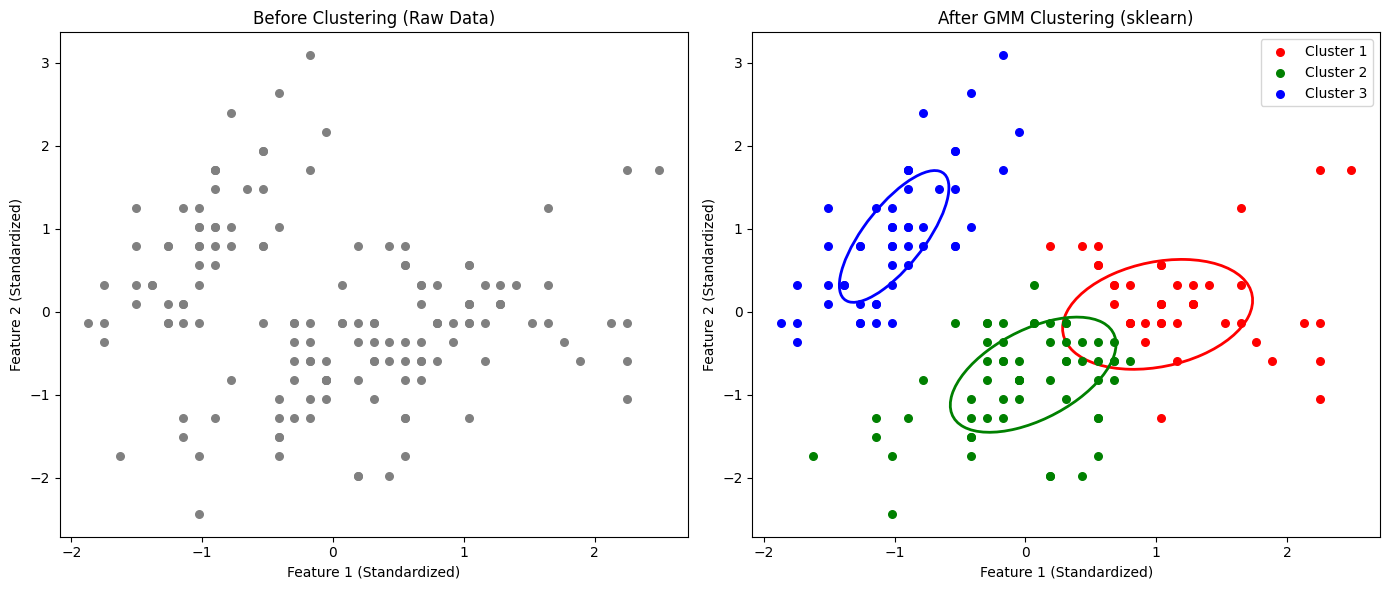

In [ ]:
def plot_gaussian_ellipse(ax, mean, cov, color):
    vals, vecs = np.linalg.eigh(cov)
    order = vals.argsort()[::-1]
    vals, vecs = vals[order], vecs[:, order]
    angle = np.degrees(np.arctan2(*vecs[:,0][::-1]))
    width, height = 2 * np.sqrt(vals)
    ellipse = Ellipse(xy=mean, width=width, height=height, angle=angle,
                      edgecolor=color, fc='None', lw=2)
    ax.add_patch(ellipse)

fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Before Clustering
axs[0].scatter(X[:, 0], X[:, 1], s=30, color='gray')
axs[0].set_title("Before Clustering (Raw Data)")
axs[0].set_xlabel("Feature 1 (Standardized)")
axs[0].set_ylabel("Feature 2 (Standardized)")

# After Clustering
for k in range(n_components):
    cluster_points = X[labels == k]
    axs[1].scatter(cluster_points[:, 0], cluster_points[:, 1], s=30, color=colors[k], label=f'Cluster {k+1}')
    plot_gaussian_ellipse(axs[1], means[k], covariances[k], colors[k])

axs[1].set_title("After GMM Clustering (sklearn)")
axs[1].set_xlabel("Feature 1 (Standardized)")
axs[1].set_ylabel("Feature 2 (Standardized)")
axs[1].legend()

plt.tight_layout()
plt.show()

**⏰ Observation:**

The Gaussian Mixture Model (GMM) clustering clearly grouped the data into three separate clusters, each shown with different colors and shaped by ellipses. These ellipses show the direction, spread, and shape of each cluster, which GMM can capture well because it does not assume that all clusters are the same size or shape. The clusters are fairly compact and do not overlap too much, which means the model was able to find real patterns in the data. Also, GMM allows points near the edges of clusters to partly belong to more than one group, which makes the clustering more flexible and realistic. Overall, the results show that GMM successfully found meaningful groupings in the data and that choosing three clusters was a good fit.